# Generating Base Inputs

In [1]:
import pandas as pd
print("Pandas Version {:s}".format(pd.__version__))

import numpy as np
print("Numpy Version {:s}".format(np.__version__))

import plotly as ptl
ptl.tools.set_credentials_file(username='jahirmedinacs', api_key='VSGMqFVozfMEdKuQH9Ge')
print("Plotly Version {:s}".format(ptl.__version__))

import matplotlib as mtplt
import matplotlib.pyplot as plt

Pandas Version 0.22.0
Numpy Version 1.14.3
Plotly Version 2.7.0


In [2]:
#A_i : Letter A inverted
A_i = np.ndarray(shape=(5,5), dtype=int,
                 buffer=np.matrix(
                    [
                        [+1, -1, -1, -1, +1],
                        [+1, -1, -1, -1, +1],
                        [-1, +1, +1, +1, -1],
                        [-1, +1, -1, +1, -1],
                        [-1, -1, +1, -1, -1]
                     ])
                )

#A_n : Letter A normal
A_n = np.rot90(A_i, 2)


In [3]:
def to_bin(data_input):
    alt_data_input = (data_input >= 0) 
    return alt_data_input.astype(int)

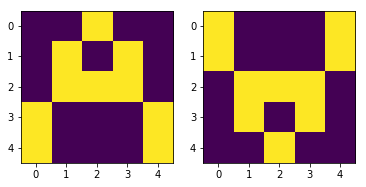

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(to_bin(A_n))

plt.subplot(1, 2, 2)
plt.imshow(to_bin(A_i))

plt.show()

# Sampler Function

In [5]:
import copy

def noise_inductor(data_input, ratio=1, verbose=False):
    rand_x = np.random.randint(data_input.shape[0])
    rand_y = np.random.randint(data_input.shape[1])
    
    if verbose:
        print("[{:d}, {:d}]".format(rand_x, rand_y))
        
    output = copy.copy(data_input)
    if output[rand_x, rand_y] == +1:
        output[rand_x, rand_y] = -1
    else:
        output[rand_x, rand_y] = +1
    
    return output

In [6]:
def sampler(data_template, samples=10):
    if data_template.size < samples:
        return None
    else:
        pass
    
    output = []
    for _ in range(samples):
        yield noise_inductor(data_template)
        output.append(noise_inductor(data_template))
    
    return output

In [7]:
data_container = []

In [8]:
def sampler_visual(dummy, label, def_cols=4, full_samples=10, output=None):
    data_container = []
    samples= full_samples - 1
    def_rows = int(np.ceil(full_samples / def_cols))

    index = 0
    for ii in sampler(dummy, samples):
        # print(ii, "\n\n")
        data_container.append([ii, label])
        #print(index // def_cols + 1, index%def_cols + 1)
        plt.subplot(def_rows, def_cols, index + 1)
        plt.imshow(to_bin(ii))
        index += 1
        
    data_container.append([dummy, label])
    output += data_container
    
    plt.subplot(def_rows, def_cols, def_rows*def_cols)    
    plt.show

# Samples Regular A

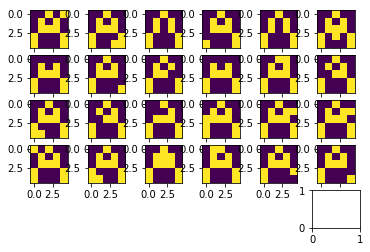

In [9]:
sampler_visual(dummy=A_n, label=1, def_cols=6, full_samples=25, output=data_container)

# Samples Inverted A

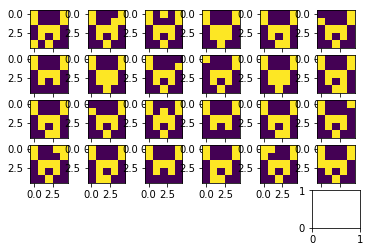

In [10]:
sampler_visual(dummy=A_i, label=-1, def_cols=6, full_samples=25, output=data_container)

# Saving as DataSet (Pandas)

In [11]:
numpy_dataframe = np.zeros((len(data_container), 25 + 1))

index = 0
for case in data_container:
	case[0] = np.ndarray.flatten(case[0])

	numpy_dataframe[index, 1:] = case[0]
	numpy_dataframe[index, 0] = case[1]
	index += 1

dataframe = pd.DataFrame(numpy_dataframe , dtype=int)
# print(dataframe)
dataframe.to_csv("./dataset.csv")